In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


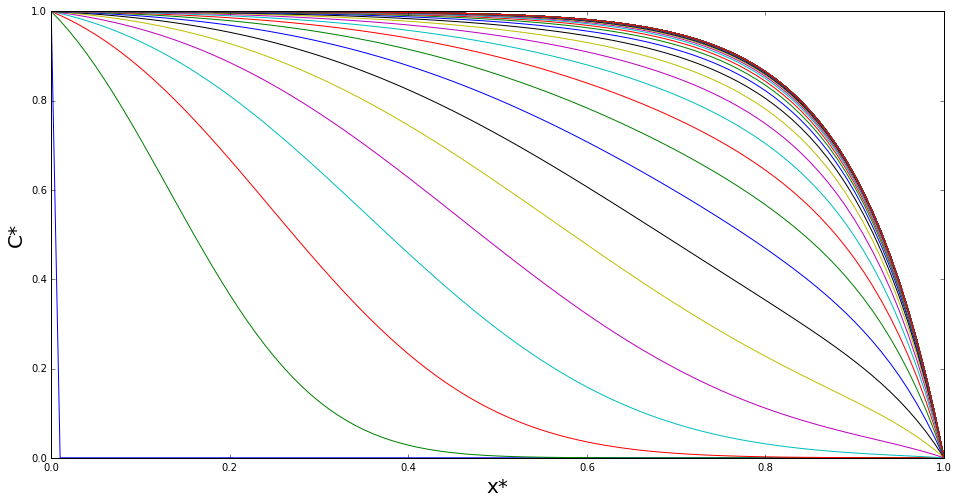

In [2]:
imax=101
L=1.0
#set intial condition as zero concentration
Cold=zeros(imax)
Cnew=zeros(imax)

x=linspace(0,L,imax)

#set Peclet number
Pe = 10.0

dx=L/(imax-1)

#Time step set based on stability criterion
#advective stability criterion
dt=dx/(Pe)
#include diffusive criterion
dt = 0.2*min(dt,0.5*(dx**2))

#set inlet concentration
Cnew[0]=1.0
Cold[0]=1.0

t=0.0
tout=0.0
dtout=0.01

if (dt>dtout):
    dt=dtout

#run for 10 non-dimensional time steps
t_max = 1.0

figure(num=None, figsize=(16, 8), dpi=80, facecolor='w', edgecolor='k')
xlabel('x*', fontsize=20)
ylabel('C*', fontsize=20)

plot(x,Cold)
tout+=dtout

#continue until the maximum time is exceded
while (t<t_max):
    #explicitely set new concentration based on old concentration
    for i in range(1,imax-1,1):
        Cnew[i]=dt*((1.0/(dx**2))*(Cold[i+1]+Cold[i-1]-2.0*Cold[i])-(Pe/(2.*dx))*(Cold[i+1]-Cold[i-1]))+Cold[i]
        
    t+=dt
    
    #plot a line at the specified time interval
    if (t>=tout):
        plot(x,Cnew)
        tout+=dtout
        
    #swap the old and the new arrays of concentration values
    Ctemp=Cold
    Cold=Cnew
    Cnew=Ctemp
    
show()